In [3]:
import json

!pwd

with open('./benchmarks/xgraph/result_jsons/bbbp.json') as f:
    jsonObj = json.load(f)

/home/basil/University/UJ/PracaMgr/DIG


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

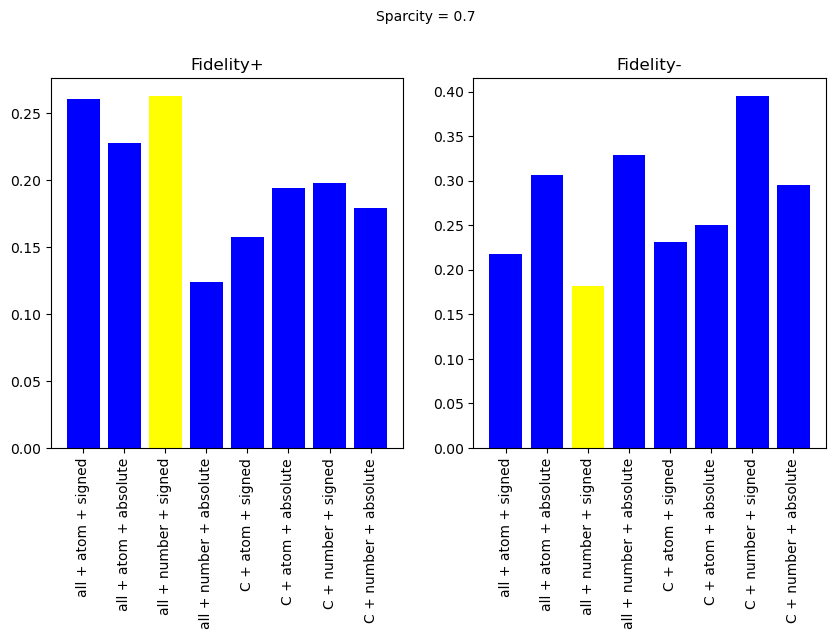

In [13]:
results = jsonObj["custom"]["0.7"]

import matplotlib.pyplot as plt
import numpy

f = plt.figure(figsize=(10, 4.8))

f.text(0.45, 1, s='Sparcity = 0.7')

labels = list(map(lambda k: k.replace('0.7 + ', ''), results.keys()))

plt.subplot(1, 2, 1)

plt.title("Fidelity+")
fidelity = [r['fidelity'] for r in results.values()]
max_idx = numpy.argmax(fidelity)
colors = ['blue' for _ in fidelity]
colors[max_idx] = 'yellow'
plt.bar(labels, fidelity, color=colors)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
plt.title("Fidelity-")
fidelity_inv = [r['fidelity_inv'] for r in results.values()]
min_idx = numpy.argmin(fidelity_inv)
colors = ['blue' for _ in fidelity_inv]
colors[min_idx] = 'yellow'
plt.bar(labels, fidelity_inv, color=colors)
plt.xticks(rotation = 90)

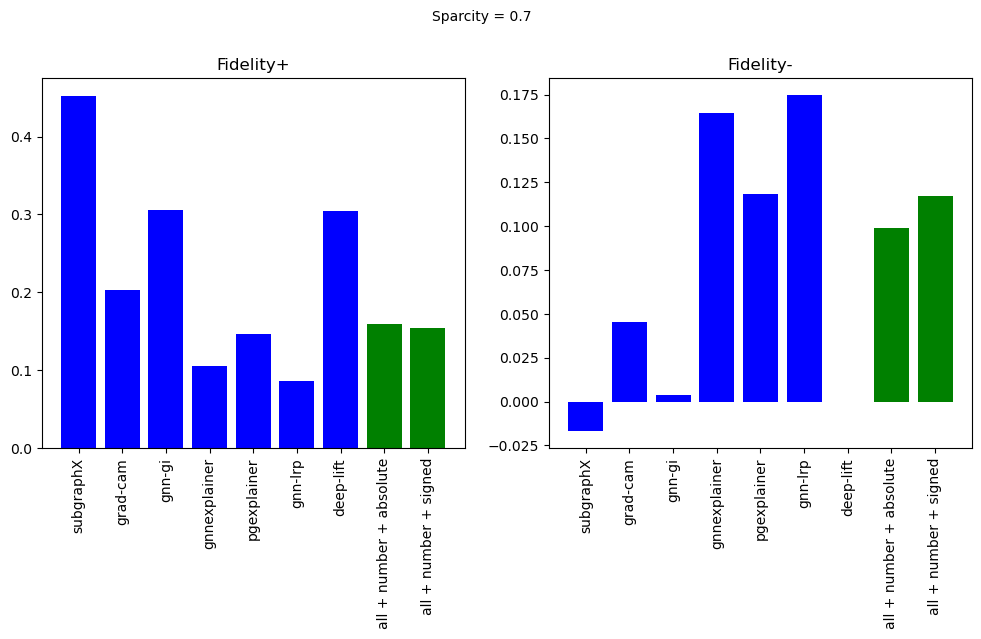

In [12]:
from matplotlib import pyplot as plt\

all = {
    'fidelity' : {
        'subgraphX': 0.4521,
        'grad-cam': 0.2036,
        'gnn-gi': 0.3051,
        'gnnexplainer': 0.1057,
        'pgexplainer': 0.1464,
        'gnn-lrp': 0.0860,
        'deep-lift': 0.3039,
        'all + number + absolute': jsonObj["custom"]["0.7"]["all + number + absolute"]["fidelity"],
        'all + number + signed': jsonObj["custom"]["0.7"]["all + number + signed"]["fidelity"]
    },
    'fidelity_inv' : {
        'subgraphX': -0.0169,
        'grad-cam': 0.0456,
        'gnn-gi': 0.0039,
        'gnnexplainer': 0.1647,
        'pgexplainer': 0.1183,
        'gnn-lrp': 0.1746,
        'deep-lift': -0.0002,
        'all + number + absolute': jsonObj["custom"]["0.7"]["all + number + absolute"]["fidelity_inv"],
        'all + number + signed': jsonObj["custom"]["0.7"]["all + number + signed"]["fidelity_inv"]
    }
}

f = plt.figure(figsize=(12, 4.8))

f.text(0.45, 1, s='Sparcity = 0.7')

plt.subplot(1, 2, 1)
plt.title("Fidelity+")
fidelity = all['fidelity'].values()
colors = ['blue' for _ in fidelity]
colors[-1] = colors[-2] = 'green'
plt.bar(all['fidelity'].keys(), fidelity, color=colors)
plt.xticks(rotation = 90)


plt.subplot(1, 2, 2)
plt.title("Fidelity-")
fidelity_inv = all['fidelity_inv'].values()
colors = ['blue' for _ in fidelity_inv]
colors[-1] = colors[-2] = 'green'
plt.bar(all['fidelity_inv'].keys(), fidelity_inv, color=colors)
plt.xticks(rotation = 90)

plt.savefig('all_methods_0.7_sparcity.png', bbox_inches='tight')

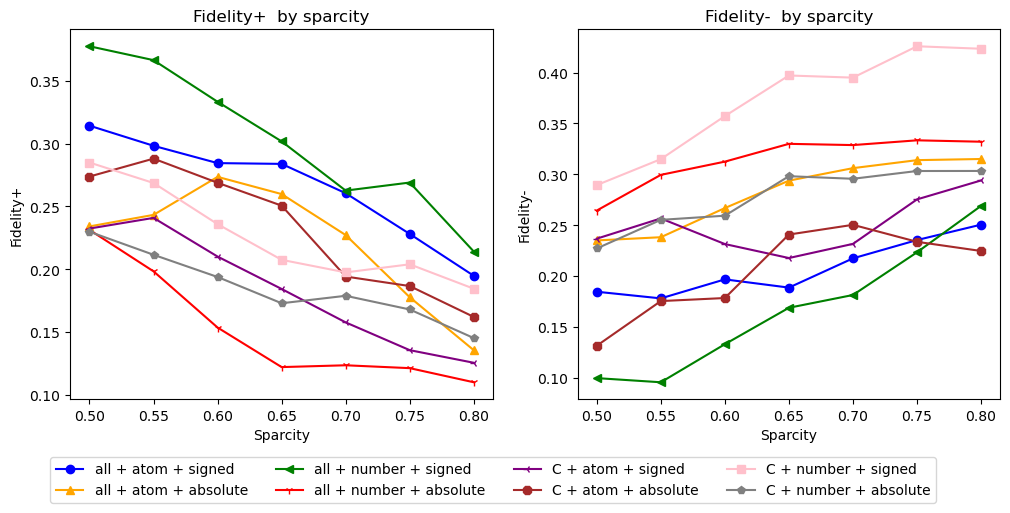

In [14]:
from collections import defaultdict
fidelity = defaultdict(list)
fidelity_inv = defaultdict(list)
sparcities = []

markers = ["o", "^", "<", "1", "3", "8", "s", "p", "*"]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey']

for sparcity, results in jsonObj['custom'].items():
    sparcities.append(float(sparcity))
    for configuration, values in results.items():
        fidelity[configuration].append(values['fidelity'])
        fidelity_inv[configuration].append(values['fidelity_inv'])

_, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12, 4.8))

ax1.set_ylabel('Fidelity+')
ax1.set_xlabel('Sparcity')
ax1.set_title('Fidelity+  by sparcity')

ax2.set_ylabel('Fidelity-')
ax2.set_xlabel('Sparcity')
ax2.set_title('Fidelity-  by sparcity')

for idx, configuration in enumerate(fidelity):
    ax1.plot(sparcities, fidelity[configuration], label=configuration, marker=markers[idx], color=colors[idx])
    ax2.plot(sparcities, fidelity_inv[configuration], label=configuration, marker=markers[idx], color=colors[idx])

plt.legend(loc='lower center', bbox_to_anchor=(-.2, -.3),
          ncol=4, fancybox=True)

plt.savefig('custom_method_scatter_bace.png', bbox_inches='tight')

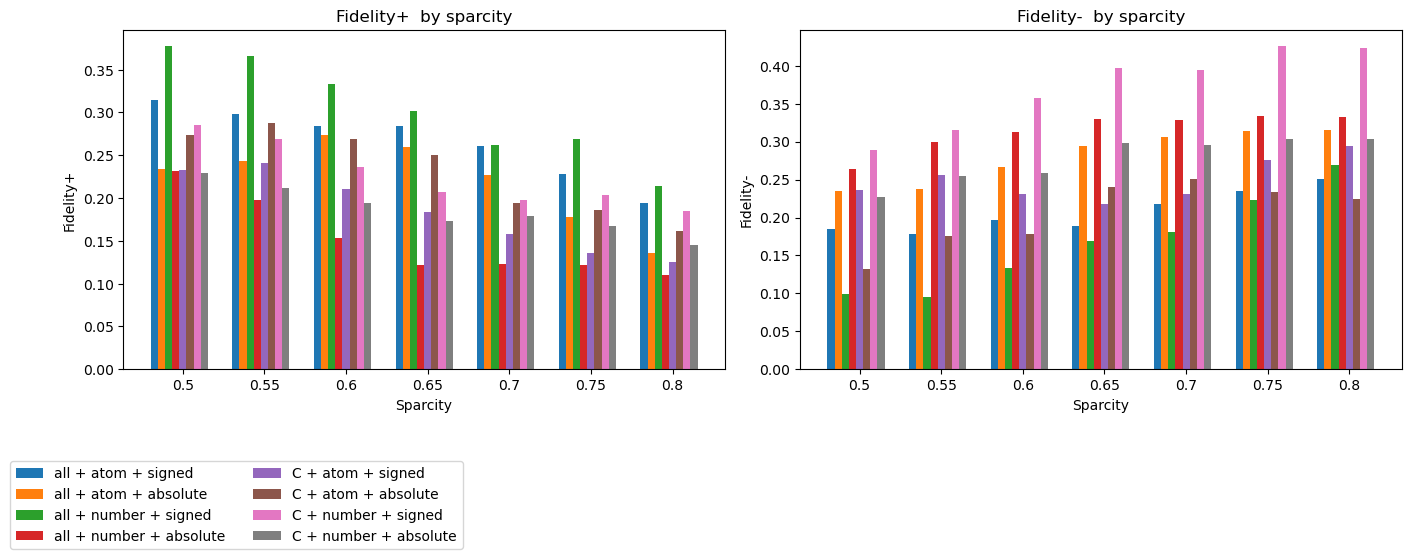

In [15]:
from ast import fix_missing_locations
import numpy as np

multiplier = 0.2
labels = [str(s) for s in sparcities]

x = np.arange(len(labels)) * multiplier # the label locations
width = 0.7 * multiplier # the width of the bars

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(14, 6))

rects = []
rects2 = []
for idx, config in enumerate(fidelity):
    rects.append(ax.bar(x - width/2 + idx * (width / len(fidelity)), fidelity[config], width / len(fidelity), label=config))
    rects2.append(ax2.bar(x - width/2 + idx * (width / len(fidelity_inv)), fidelity_inv[config], width / len(fidelity_inv), label=config))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fidelity+')
ax.set_xlabel('Sparcity')
ax.set_title('Fidelity+  by sparcity')
ax.set_xticks(ticks=x, minor=False)
ax.set_xticklabels(labels, fontdict=None, minor=False)


ax2.set_ylabel('Fidelity-')
ax2.set_xlabel('Sparcity')
ax2.set_title('Fidelity-  by sparcity')
ax2.set_xticks(ticks=x, minor=False)
ax2.set_xticklabels(labels, fontdict=None, minor=False)


ax.legend(loc='upper left', ncol=2, bbox_to_anchor=(-.2, -.25))

# [ax.bar_label(r, padding=3) for r in rects]

fig.tight_layout()


plt.savefig('custom_method_bars_bace.png', bbox_inches='tight')

In [1]:
with open('./benchmarks/xgraph/result_jsons/bbbp.json') as f:
    jsonObj = json.load(f)


NameError: name 'json' is not defined

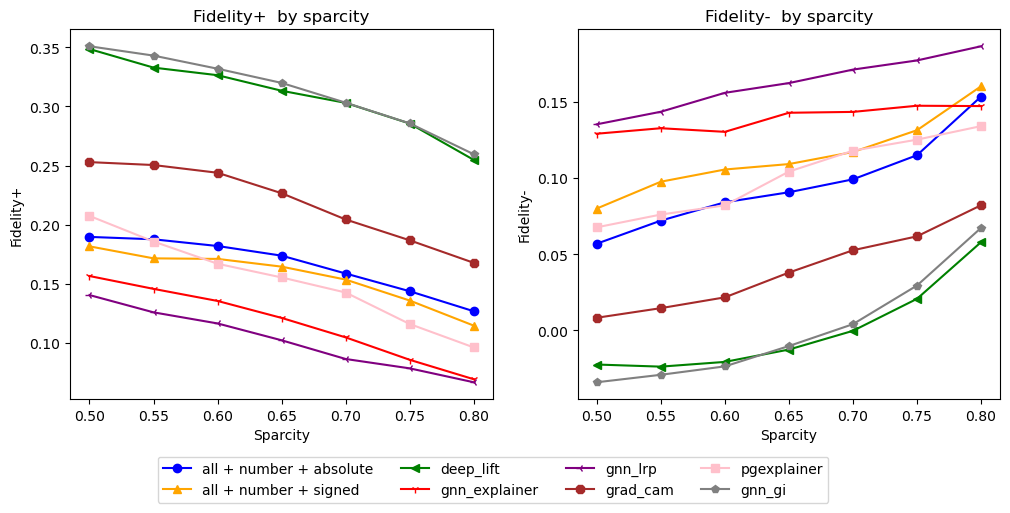

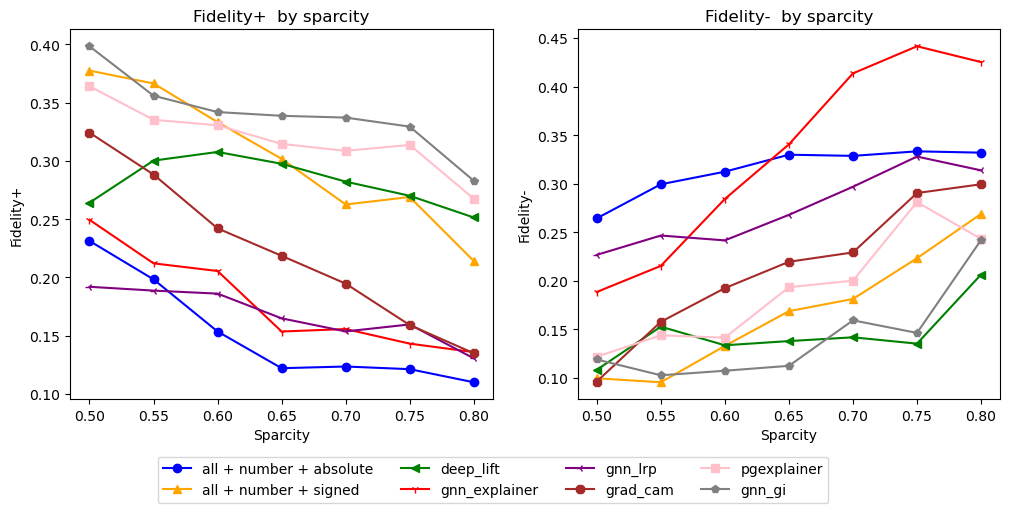

In [39]:
from collections import defaultdict
for dataset in ['bbbp', 'bace']:
    with open(f'./benchmarks/xgraph/result_jsons/{dataset}.json') as f:
        jsonObj = json.load(f)

    fidelity = defaultdict(list)
    fidelity_inv = defaultdict(list)
    sparcities = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]

    markers = ["o", "^", "<", "1", "3", "8", "s", "p", "*"]
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'cyan']


    for method, results in jsonObj.items():
        if method == 'subgraphx':
            continue
        elif method != 'custom':
            for values in results.values():
                fidelity[method].append(values['fidelity'])
                fidelity_inv[method].append(values['fidelity_inv'])
        else:
            for values in results.values():
                for config in ['all + number + absolute', 'all + number + signed']:
                    fidelity[config].append(values[config]['fidelity'])
                    fidelity_inv[config].append(values[config]['fidelity_inv'])

    _, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12, 4.8))

    ax1.set_ylabel('Fidelity+')
    ax1.set_xlabel('Sparcity')
    ax1.set_title('Fidelity+  by sparcity')

    ax2.set_ylabel('Fidelity-')
    ax2.set_xlabel('Sparcity')
    ax2.set_title('Fidelity-  by sparcity')

    for idx, method in enumerate(fidelity):
        ax1.plot(sparcities[:len(fidelity[method])], fidelity[method], label=method, marker=markers[idx], color=colors[idx])
        ax2.plot(sparcities[:len(fidelity_inv[method])], fidelity_inv[method], label=method, marker=markers[idx], color=colors[idx])

    plt.legend(loc='lower center', bbox_to_anchor=(-.2, -.3),
            ncol=4, fancybox=True)
    plt.savefig(f'custom_vs_others_{dataset}.png', bbox_inches='tight')
    plt.show()


In [17]:
questions = [
    {
        'molecule': '2-Pyrrolidone',
        'results': {
            'Grad-CAM': 0,
            'SaliencyMap': 0,
            'all + number + signed': 0,
            'all + number + absolute': 4,
            'zero + absolute': 0
        }  
    },
    {
        'molecule': 'Deoxycorticosteron',
        'results': {
            'Grad-CAM': 0,
            'SaliencyMap': 0,
            'all + number + signed': 2,
            'all + number + absolute': 2,
            'zero + absolute': 0
        }  
    },
    {
        'molecule': 'Carboxin',
        'results': {
            'Grad-CAM': 0,
            'SaliencyMap': 2,
            'all + number + signed': 0,
            'all + number + absolute': 0,
            'zero + absolute': 2
        }  
    },
    {
        'molecule': 'Ethion',
        'results': {
            'Grad-CAM': 1,
            'SaliencyMap': 2,
            'all + number + signed': 0,
            'all + number + absolute': 0,
            'zero + absolute': 1
        }  
    },
    {
        'molecule': '2-Nitropropane',
        'results': {
            'Grad-CAM': 1,
            'SaliencyMap': 0,
            'all + number + signed': 0,
            'all + number + absolute': 3,
            'zero + absolute': 0
        }  
    }
]

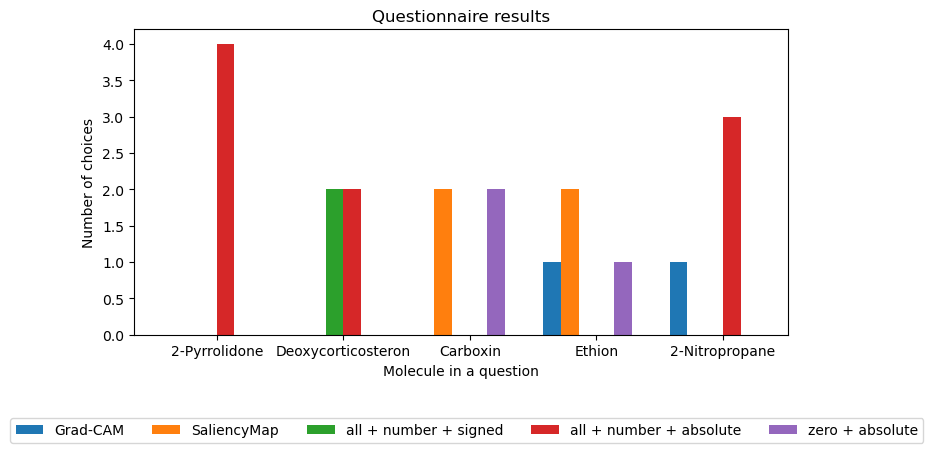

In [23]:
from ast import fix_missing_locations
import numpy as np

multiplier = 0.2
labels = [q['molecule'] for q in questions]

methods = questions[0]['results'].keys()

x = np.arange(len(labels)) * multiplier # the label locations
width = 0.7 * multiplier # the width of the bars

fig, (ax) = plt.subplots(1, 1, figsize=(9, 4.8))

rects = []
for idx, method in enumerate(methods):
    values = []
    for q in questions:
        values.append(q['results'][method])

    rects.append(ax.bar(x - width/2 + idx * (width / len(methods)), values, width / len(methods), label=method))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of choices')
ax.set_xlabel('Molecule in a question')
ax.set_title('Questionnaire results')
ax.set_xticks(ticks=x, minor=False)
ax.set_xticklabels(labels, fontdict=None, minor=False)


ax.legend(loc='upper left', ncol=5, bbox_to_anchor=(-.2, -.25))

# [ax.bar_label(r, padding=3) for r in rects]

fig.tight_layout()


plt.savefig('custom_method_vs_others_questionnaire.png', bbox_inches='tight')